In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

from src.data_exploration.data_exploration import *

In [3]:
df = read_sqlite_table('housedata', './data/raw/rome_house_raw.db')

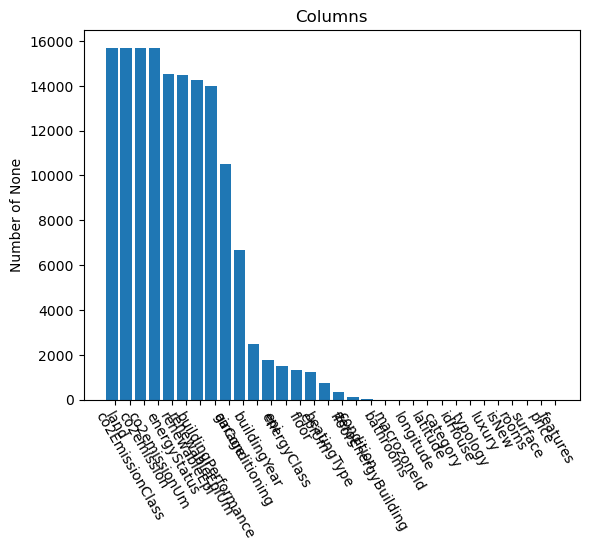

In [4]:
plot_bar(df, 'None')

In [5]:
df['garage'] = df['garage'].str.slice(stop=2)
df['garage'] = df['garage'].replace('No', '0')
df['garage'] = df['garage'].astype(int)

In [6]:
df.columns

Index(['macrozoneId', 'idHouse', 'latitude', 'longitude', 'price',
       'buildingYear', 'surface', 'rooms', 'bathrooms', 'floor', 'floors',
       'garage', 'land', 'isNew', 'luxury', 'typology', 'category',
       'condition', 'heatingType', 'airConditioning', 'energyClass',
       'zeroEnergyBuilding', 'epi', 'epiUm', 'renewableEpi', 'renewableEpiUm',
       'co2emission', 'co2emissionUm', 'co2EmissionClass', 'energyStatus',
       'buildingPerformance', 'features'],
      dtype='object')

In [7]:
cols_to_drop = ['idHouse','floors', 'heatingType', 'airConditioning', 'energyClass',
                'zeroEnergyBuilding', 'epi', 'epiUm', 'renewableEpi', 'renewableEpiUm',
                'co2emission', 'co2emissionUm', 'co2EmissionClass', 'energyStatus','buildingPerformance','land']
df = df.drop(cols_to_drop, axis = 1)

In [8]:
df.shape

(15703, 16)

In [9]:
uniques = []
for col in df.columns:
    uniques.append(df[col].nunique())
uniques = pd.DataFrame(uniques,df.columns)
uniques = uniques.sort_values(0, ascending=False)

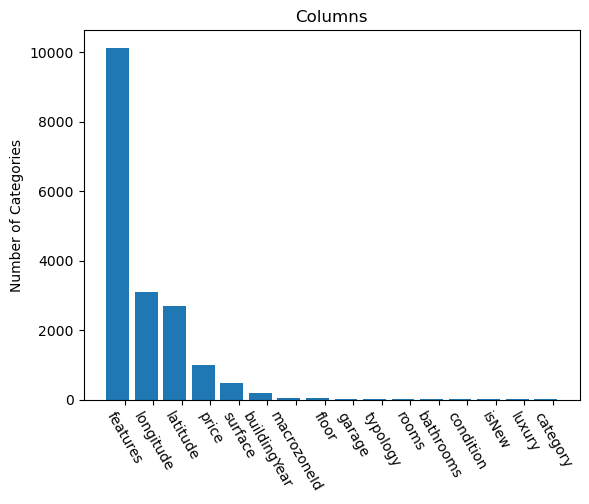

In [10]:
fig, ax = plt.subplots()

columns = list(uniques.index)
counts = uniques[0]

ax.bar(columns, counts, label=columns)

ax.set_ylabel('Number of Categories')
ax.set_title('Columns')
x = np.arange(len(columns))
width = 0.25
ax.set_xticks(x + width, columns, rotation=-60)

plt.show()

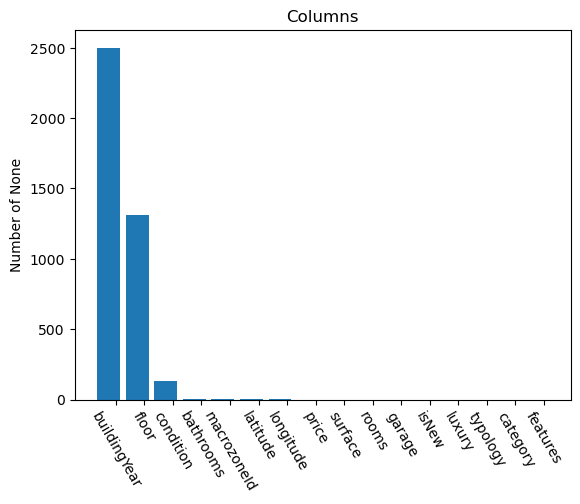

In [11]:
plot_bar(df, 'None')

In [12]:
df['condition'].unique()

array(['Ottimo / Ristrutturato', 'Buono / Abitabile',
       'Nuovo / In costruzione', 'Da ristrutturare', 'None'], dtype=object)

In [13]:
df['category'].unique()

array(['Residenziale', 'Palazzi - Edifici'], dtype=object)

In [14]:
df['typology'].unique()

array(['Appartamento', 'Attico - Mansarda', 'Palazzo - Edificio', 'Loft',
       'Villa', 'Villetta a schiera', 'Rustico - Casale',
       'Casa indipendente'], dtype=object)

In [15]:
df['floor'].unique()

array(['T', 'S', '4', '3', '7', '1', 'None', 'R', '5', '5 - 6', '2', '8',
       '9', '6', 'S - T', '8 - 9', '4 - 5', '7 - 8', '6 - 7', '14', '17',
       '16', '1 - 2', '3 - 4', '20', '26', '11', '10', '12', '2 - 3',
       'S2', 'A', '13', 'M', '1 - 4', '1 - 3', '11 - 12', 'S4', 'S3',
       'T - R', '9 - 10', 'S5', 'R - R', '4 - 6', '3 - 5'], dtype=object)

In [16]:
df1 = df.copy()

In [17]:
df1.loc[df1.groupby('floor')['floor'].transform('count').lt(20), 'floor'] = 'None'

In [18]:
df1['floor'].value_counts()   

1        3135
2        2518
3        2087
T        1910
4        1527
None     1380
5         987
R         495
6         481
7         402
S         309
8         204
S - T      62
1 - 2      40
3 - 4      37
9          31
4 - 5      31
5 - 6      26
2 - 3      21
10         20
Name: floor, dtype: int64

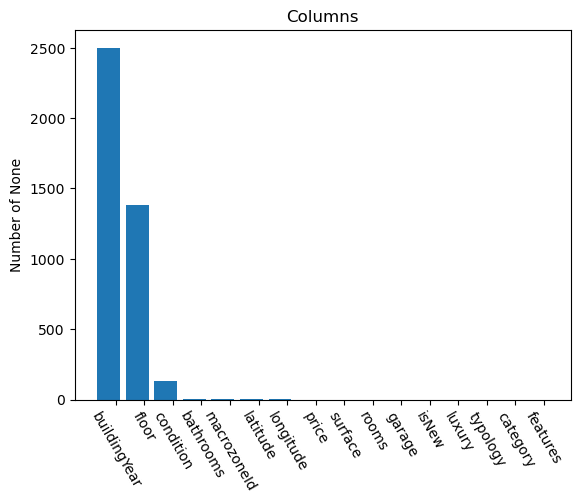

In [19]:
plot_bar(df1,missing_value='None')

In [31]:
df2 = df1.copy()
df2.loc[df2.groupby('buildingYear')['buildingYear'].transform('count').lt(20), 'buildingYear'] = 'None'

In [34]:
df2['buildingYear'].value_counts()

None    2911
1960    2462
1970    1543
1950     883
1980     676
        ... 
1997      22
1983      22
1991      21
1981      21
1988      21
Name: buildingYear, Length: 85, dtype: int64

In [35]:
save_to_sql('./data/processed/rome_house_preprocessing.db', df2, 'housedata')